## UR10e Robot with DH Model

In [40]:
import numpy as np
import roboticstoolbox as rtb
from spatialmath import *
# spatialgeometry is a utility package for dealing with geometric objects
import spatialgeometry as sg
# spatial math provides objects for representing transformations
import spatialmath as sm
# typing utilities
from typing import Tuple
# the Python math library
import math

from math import pi
import matplotlib.pyplot as plt
from matplotlib import cm
np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

%matplotlib notebook

ur10 = rtb.models.DH.UR10()
print(ur10)

DHRobot: UR10 (by Universal Robotics), 6 joints (RRRRRR), dynamics, standard DH parameters
┌────┬────────┬─────────┬────────┐
│θⱼ  │   dⱼ   │   aⱼ    │   ⍺ⱼ   │
├────┼────────┼─────────┼────────┤
│ q1 │ 0.1273 │       0 │  90.0° │
│ q2 │      0 │  -0.612 │   0.0° │
│ q3 │      0 │ -0.5723 │   0.0° │
│ q4 │ 0.1639 │       0 │  90.0° │
│ q5 │ 0.1157 │       0 │ -90.0° │
│ q6 │ 0.0922 │       0 │   0.0° │
└────┴────────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌─────┬───────┬─────┬─────┬─────┬──────┬─────┐
│name │ q0    │ q1  │ q2  │ q3  │ q4   │ q5  │
├─────┼───────┼─────┼─────┼─────┼──────┼─────┤
│  qr │  180° │  0° │  0° │  0° │  90° │  0° │
│  qz │  0°   │  0° │  0° │  0° │  0°  │  0° │
└─────┴───────┴─────┴─────┴─────┴──────┴─────┘



<IPython.core.display.Javascript object>


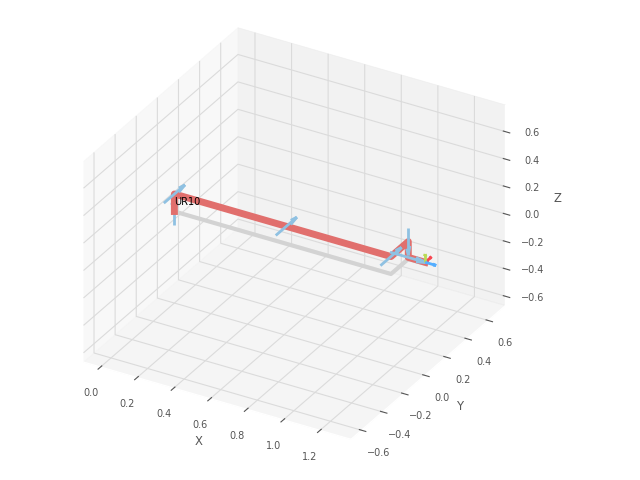

PyPlot3D backend, t = 0.05, scene:
  UR10

In [41]:
ur10.plot(ur10.qr)

In [42]:
ur10.fkine(ur10.qr)

   0         0         1         1.276     
   1         0         0         0.1639    
   0         1         0         0.0116    
   0         0         0         1         


In [43]:
#
T = SE3(0.5, 0.2, 0.5) * SE3.OA([0,0,1], [1,0,0])
T

   0         0         1         0.5       
   1         0         0         0.2       
   0         1         0         0.5       
   0         0         0         1         


In [44]:
sol = ur10.ikine_LM(T)
sol

IKsolution(q=array([  -3.055,   -1.799,    1.988,  -0.1894,    1.657,        0]), success=True, reason=None, iterations=17, residual=2.98064566624149e-12)

In [45]:
# To check the inverse kinematic solution we can get the forward kinematic
# to get back the orginal position of end-effector
ur10.fkine(sol.q)

  -6.423e-13 -3.423e-13  1         0.5       
   1         0         6.423e-13  0.2       
   0         1         3.423e-13  0.5       
   0         0         0         1         


In [46]:
qt = rtb.tools.trajectory.jtraj(ur10.qr, sol.q, 50)

In [47]:
qt.q

array([[   3.142,        0,        0,        0,    1.571,        0],
       [   3.141, -0.0001483, 0.0001639, -1.561e-05,    1.571,        0],
       [   3.138, -0.00115, 0.001271, -0.000121,    1.571,        0],
       [   3.129, -0.003759, 0.004155, -0.0003956,    1.571,        0],
       [   3.112, -0.008627, 0.009536, -0.0009081,    1.571,        0],
       [   3.085, -0.01631,  0.01802, -0.001717,    1.572,        0],
       [   3.048, -0.02726,  0.03013, -0.002869,    1.572,        0],
       [   2.997, -0.04185,  0.04626, -0.004405,    1.573,        0],
       [   2.934, -0.06037,  0.06673, -0.006355,    1.574,        0],
       [   2.856, -0.08302,  0.09176, -0.008738,    1.575,        0],
       [   2.763,  -0.1099,   0.1215, -0.01157,    1.576,        0],
       [   2.655,  -0.1412,    0.156, -0.01486,    1.578,        0],
       [   2.533,  -0.1767,   0.1953,  -0.0186,    1.579,        0],
       [   2.396,  -0.2164,   0.2392, -0.02278,    1.581,        0],
       [   2.245,

<IPython.core.display.Javascript object>


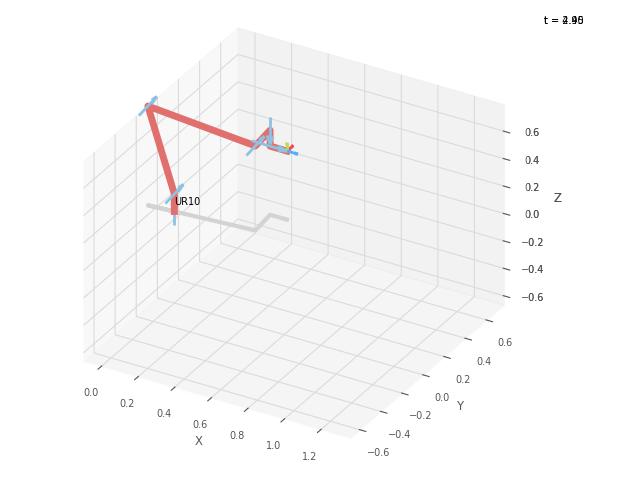

In [48]:
ur10.plot(qt.q, dt=0.1);

In [49]:
#Using Swift for simulation
ur10.plot(qt.q)

PyPlot3D backend, t = 2.499999999999999, scene:
  UR10

## Panda Robot with ETS Model

In [50]:
import roboticstoolbox as rtb
robot = rtb.models.ETS.Panda()
ets = robot.ets()
ets

tz(0.333) ⊕ Rz(q0) ⊕ Rx(-90°) ⊕ Rz(q1) ⊕ Rx(90°) ⊕ tz(0.316) ⊕ Rz(q2) ⊕ tx(0.0825) ⊕ Rx(90°) ⊕ Rz(q3) ⊕ tx(-0.0825) ⊕ Rx(-90°) ⊕ tz(0.384) ⊕ Rz(q4) ⊕ Rx(90°) ⊕ Rz(q5) ⊕ tx(0.088) ⊕ Rx(90°) ⊕ tz(0.107) ⊕ Rz(q6) ⊕ tz(0.103) ⊕ Rz(-45°)


In [51]:
# Note for for E7 and E11 in the figure above and code below, we use flip=True
# as the variable rotation is in the negative direction.

E1 = rtb.ET.tz(0.333)
E2 = rtb.ET.Rz()
E3 = rtb.ET.Ry()
E4 = rtb.ET.tz(0.316)
E5 = rtb.ET.Rz()
E6 = rtb.ET.tx(0.0825)
E7 = rtb.ET.Ry(flip=True)
E8 = rtb.ET.tx(-0.0825)
E9 = rtb.ET.tz(0.384)
E10 = rtb.ET.Rz()
E11 = rtb.ET.Ry(flip=True)
E12 = rtb.ET.tx(0.088)
E13 = rtb.ET.Rx(np.pi)
E14 = rtb.ET.tz(0.107)
E15 = rtb.ET.Rz()
# We can make an ETS representing a Panda by incorprating all 15 ETs into an ETS
panda_ets = E1 * E2 * E3 * E4 * E5 * E6 * E7 * E8 * E9 * E10 * E11 * E12 * E13 * E14 * E15
# View the ETS
print(panda_ets)
print()

tz(0.333) ⊕ Rz(q0) ⊕ Ry(q1) ⊕ tz(0.316) ⊕ Rz(q2) ⊕ tx(0.0825) ⊕ Ry(-q3) ⊕ tx(-0.0825) ⊕ tz(0.384) ⊕ Rz(q4) ⊕ Ry(-q5) ⊕ tx(0.088) ⊕ Rx(180°) ⊕ tz(0.107) ⊕ Rz(q6)



### Forward kinematics
The forward kinematics is the first and most basic relationship between the link geometry and robot configuration.

The forward kinematics of a manipulator provides a non-linear mapping
\begin{equation*}
    {^0\bf{T}_e(t)} = {\cal K}(\bf{q}(t))
\end{equation*}
between the joint space and Cartesian task space,
where $\bf{q}(t) = (q_1(t), q_2(t), \cdots q_n(t)) \in \mathbb{R}^n$ is the vector of joint generalised coordinates, $n$ is the number of joints, and ${^0\bf{T}_e}  \in \bf{SE}{3}$ is a homogeneous transformation matrix representing the pose of the robot's end-effector in the world-coordinate frame. The ETS model defines $\cal{K}(\cdot)$ as the product of $M$ elementary transforms $\bf{E}_i \in \bf{SE}{3}$
\begin{align*}
    {^0\bf{T}_e(t)}  &= \bf{E}_1(\eta_1) \ \bf{E}_2(\eta_2) \ \cdot\cdot\cdot \ \bf{E}_M(\eta_M) \\
    &= \prod_{i=1}^{M} \bf{E}_i(\eta_i).
\end{align*}

In [52]:
# Using the above methodolgy, we can calculate the forward kinematics of our Panda model
# First, we must define the joint coordinates q, to calculate the forward kinematics at
q = np.array([0, -0.3, 0, -2.2, 0, 2, 0.79])

# Allocate the resulting forward kinematics array
fk = np.eye(4)

# Now we must loop over the ETs in the Panda
for et in panda_ets:
    if et.isjoint:
        # This ET is a variable joint
        # Use the q array to specify the joint angle for the variable ET
        fk = fk @ et.A(q[et.jindex])
    else:
        # This ET is static
        fk = fk @ et.A()

# Pretty print our resulting forward kinematics using an SE3 object
print(sm.SE3(fk))

   0.7003   -0.7068    0.09983   0.4737    
  -0.7104   -0.7038    0         0         
   0.07027  -0.07092  -0.995     0.5155    
   0         0         0         1         



In [53]:
# The ETS class has the .fkine method which can calculate the forward kinematics
# The .fkine methods returns an SE3 object
print(f"The fkine method: \n{panda_ets.fkine(q)}")

The fkine method: 
   0.7003   -0.7068    0.09983   0.4737    
  -0.7104   -0.7038    0         0         
   0.07027  -0.07092  -0.995     0.5155    
   0         0         0         1         



## UR10e Robot ETS Model

In [54]:
# # UR10e Parameters
# d1 = 0.1807
# d4 = 0.17415
# d5 = 0.11985
# d6 = 0.11655
# a2 = 0.6127
# a3 = 0.57155

# alpha1 = np.pi/2
# alpha4 = np.pi/2
# alpha5 = -np.pi/2

# UR10 Parameters
d1 = 0.1273
d4 = 0.1639
d5 = 0.1157
d6 = 0.0922
a2 = 0.612
a3 = 0.5723

alpha1 = np.pi/2
alpha4 = np.pi/2
alpha5 = -np.pi/2

## ETS Parameters

E1 = rtb.ET.Rz()
E2 = rtb.ET.tz(d1)
E3 = rtb.ET.Rx(alpha1)

E4 = rtb.ET.Rz()
E5 = rtb.ET.tx(-a2)

E6 = rtb.ET.Rz()
E7 = rtb.ET.tx(-a3)

E8 = rtb.ET.Rz()
E9 = rtb.ET.tz(d4)
E10 = rtb.ET.Rx(alpha4)

E11 = rtb.ET.Rz()
E12 = rtb.ET.tz(d5)
E13 = rtb.ET.Rx(alpha5)

E14 = rtb.ET.Rz()
E15 = rtb.ET.tz(d6)

# We can make an ETS representing a Panda by incorprating all 15 ETs into an ETS
ur10e_ets = E1 * E2 * E3 * E4 * E5 * E6 * E7 * E8 * E9 * E10 * E11 * E12 * E13 * E14 * E15
# View the ETS
print(ur10e_ets)
print()

Rz(q0) ⊕ tz(0.1273) ⊕ Rx(90°) ⊕ Rz(q1) ⊕ tx(-0.612) ⊕ Rz(q2) ⊕ tx(-0.5723) ⊕ Rz(q3) ⊕ tz(0.1639) ⊕ Rx(90°) ⊕ Rz(q4) ⊕ tz(0.1157) ⊕ Rx(-90°) ⊕ Rz(q5) ⊕ tz(0.0922)



In [55]:
ur_test = E1*E2*E3*E4*E5*E6*E7*E8*E9*E10*E11*E12*E13*E14
print(ur_test)
q=np.array([0, 0, 0, 0, 0, 0])
print(f"The fkine method: \n{ur_test.fkine(q)}")

Rz(q0) ⊕ tz(0.1273) ⊕ Rx(90°) ⊕ Rz(q1) ⊕ tx(-0.612) ⊕ Rz(q2) ⊕ tx(-0.5723) ⊕ Rz(q3) ⊕ tz(0.1639) ⊕ Rx(90°) ⊕ Rz(q4) ⊕ tz(0.1157) ⊕ Rx(-90°) ⊕ Rz(q5)
The fkine method: 
   1         0         0        -1.184     
   0         0        -1        -0.1639    
   0         1         0         0.0116    
   0         0         0         1         



In [56]:
# Using the above methodolgy, we can calculate the forward kinematics of our Panda model
# First, we must define the joint coordinates q, to calculate the forward kinematics at
q = np.array([0.3, 0.1, 0.6, 0.4, 0.7, 0.8])

In [57]:
# The ETS class has the .fkine method which can calculate the forward kinematics
# The .fkine methods returns an SE3 object
print(f"The fkine method: \n{ur10e_ets.fkine(q)}")

The fkine method: 
  -0.2472   -0.9675   -0.05314  -0.8579    
  -0.5463    0.1845   -0.817    -0.5107    
   0.8003   -0.173    -0.5741   -0.4079    
   0         0         0         1         



In [16]:
ur10.fkine(q)

  -0.2472   -0.9675   -0.05314  -0.8579    
  -0.5463    0.1845   -0.817    -0.5108    
   0.8003   -0.173    -0.5741   -0.4079    
   0         0         0         1         


# Using Swift simulation

In [60]:
import swift
import roboticstoolbox as rp
import spatialmath as sm
import numpy as np

env = swift.Swift()
env.launch(realtime=True)

ur10 = rp.models.UR10()
ur10.q = ur10.qr

Tep = ur10.fkine(ur10.q) * sm.SE3.Trans(0.2, 0.2, 0.45)
print(Tep)

  -1         0         0        -1.477     
   0         1         0         0.03606   
   0         0        -1        -0.4384    
   0         0         0         1         



In [61]:
arrived = False
#
ur10.q = np.array([0.0, -1.5, 1.5, 0.0, 0.0, 0.0])
env.add(ur10)


0

In [62]:
# end-effector axes
ee_axes = sg.Axes(0.1)

# goal axes
goal_axes = sg.Axes(0.1)

# Add the axes to the environment
env.add(ee_axes)
env.add(goal_axes) 


2

In [63]:


# We can set the pose of the shape using the `.T` attribute.
# This pose can be either a spatialmat SE3 or a 4x4 ndarray
ee_axes.T = ur10.fkine(ur10.q)

# Set the goal axes to something along the x axis
goal_axes.T = sm.SE3.Trans(0.2, 0.0, 0.2)

# step the environment to view the changes
env.step(0)



In [64]:

# Step the environment with a time step of 0 seconds
env.step(0)


## Resolve Rate Motion Control

In [65]:
J = ur10.jacob0(ur10.q)
det_J = np.linalg.det(J)
print('Jacobian matrix:', J)
print('det of the Jacobian matrix:', det_J)

Jacobian matrix: [[ -0.2561   0.4948  -0.1157  -0.1157   0.0922        0]
 [  0.6156        0        0        0        0        0]
 [       0  -0.6156  -0.5723        0        0        0]
 [       0        0        0        0        0        0]
 [       0        1        1        1        0        1]
 [       1        0        0        0       -1        0]]
det of the Jacobian matrix: -1.2811172771299735e-50


In [66]:
# Change the robot configuration to the ready position
ur10.q = np.array([0.0, -1.5, 1, 0.0, 0.0, 0.0])

# Step the sim to view the robot in this configuration
env.step(0)

# Specify our desired end-effector velocity
ev = [0.1, 0.0, -0.1, 0.0, 0.0, 0.0]

# Specify our timestep
dt = 0.05

# Run the simulation for 10 seconds
for _ in range(100):

    # Work out the manipulator Jacobian using the current robot configuration
    J = ur10.jacob0(ur10.q)

    # Since the UR10 has 6 joints, the Jacobian is square, but a matrix is singular and cannot be inverted  therefore we must
    # use the pseudoinverse (the pinv method)
    J_pinv = np.linalg.pinv(J)

    # Calculate the required joint velocities and apply to the robot
    ur10.qd = J_pinv @ ev

    # Step the simulator by dt seconds
    env.step(dt)

In [67]:
# Change the robot configuration to the ready position
ur10.q = np.array([0.0, -1.5, 1, 0.0, 0.0, 0.0])

# Step the sim to view the robot in this configuration
env.step(0)

# Rotating around z-axis
ev = [0.0, 0.0, 0.0, 0.0, 0.0, -0.2]

# Specify our timestep
dt = 0.05

# Run the simulation for 10 seconds
for _ in range(100):

    # Work out the manipulator Jacobian using the current robot configuration
    J = ur10.jacob0(ur10.q)

    # Since the UR10 has 6 joints, the Jacobian is square, but a matrix is singular and cannot be inverted  therefore we must
    # use the pseudoinverse (the pinv method)
    J_pinv = np.linalg.pinv(J)

    # Calculate the required joint velocities and apply to the robot
    ur10.qd = J_pinv @ ev

    # Step the simulator by dt seconds
    env.step(dt)

### Position based Servoing

In [68]:
def angle_axis(T: np.ndarray, Td: np.ndarray) -> np.ndarray:
    """
    Returns the error vector between T and Td in angle-axis form.

    :param T: The current pose
    :param Tep: The desired pose

    :returns e: the error vector between T and Td
    """

    e = np.empty(6)

    # The position error
    e[:3] = Td[:3, -1] - T[:3, -1]

    R = Td[:3, :3] @ T[:3, :3].T

    li = np.array([R[2, 1] - R[1, 2], R[0, 2] - R[2, 0], R[1, 0] - R[0, 1]])

    if np.linalg.norm(li) < 1e-6:
        # If li is a zero vector (or very close to it)

        # diagonal matrix case
        if np.trace(R) > 0:
            # (1,1,1) case
            a = np.zeros((3,))
        else:
            a = np.pi / 2 * (np.diag(R) + 1)
    else:
        # non-diagonal matrix case
        ln = np.linalg.norm(li)
        a = math.atan2(ln, np.trace(R) - 1) * li / ln

    e[3:] = a

    return e

In [69]:
#Test pose error vector
ee_axis=sg.Axes(0.1)
ds_axis=sg.Axes(0.1)
# Add the axes to the environment
env.add(ee_axis)
env.add(ds_axis) 


4

In [70]:
# We can set the pose of the shape using the `.T` attribute.
# This pose can be either a spatialmat SE3 or a 4x4 ndarray
ee_axis.T = ur10.fkine(ur10.q)

# Set the goal axes to something along the x axis
ds_axis.T = ur10.fkine(ur10.q) * sm.SE3.Trans(0.2, 0.0, 0.0) 

# step the environment to view the changes
env.step(0)


In [72]:


# The end-effector pose of the panda (using .A to get a numpy array instead of an SE3 object)
Te = ur10.fkine(ur10.q).A
print('End-effector pose of UR10: ', Te)
# The desired pose
Tep = ur10.fkine(ur10.q) * sm.SE3.Trans(-0.3, 0.0, 0.0) 
Tep = Tep.A #Convert to numpy
print('The desired pose: ', Tep)
e = angle_axis(Te, Tep)
print(e)



End-effector pose of UR10:  [[  0.8399    0.477    0.259   0.5878]
 [  0.5427  -0.7367  -0.4034   0.2534]
 [-0.001639   0.4794  -0.8776    0.944]
 [       0        0        0        1]]
The desired pose:  [[  0.8399    0.477    0.259   0.3358]
 [  0.5427  -0.7367  -0.4034  0.09061]
 [-0.001639   0.4794  -0.8776   0.9445]
 [       0        0        0        1]]
[  -0.252  -0.1628 0.0004917        0        0        0]


In [73]:
def p_servo(
    Te: np.ndarray, Tep: np.ndarray, gain: np.ndarray, threshold: float = 0.1
) -> Tuple[np.ndarray, bool]:
    """
    Position-based servoing.

    Returns the end-effector velocity which will cause the robot to approach
    the desired pose.

    :param Te: The current pose of the end-effecor in the base frame.
    :type wTe: ndarray
    :param Tep: The desired pose of the end-effecor in the base frame.
    :type wTep: ndarray
    :param gain: The gain for the controller. A vector corresponding to each
        Cartesian axis.
    :type gain: array-like
    :param threshold: The threshold or tolerance of the final error between
        the robot's pose and desired pose
    :type threshold: float

    :returns v: The velocity of the end-effector which will casue the robot
        to approach Tep
    :rtype v: ndarray(6)
    :returns arrived: True if the robot is within the threshold of the final
        pose
    :rtype arrived: bool
    """

    # Calculate the pose error vector
    e = angle_axis(Te, Tep)

    # Construct our gain diagonal matrix
    k = np.diag(gain)

    # Calculate our desired end0effector velocity
    v = k @ e

    # Check if we have arrived
    arrived = True if np.sum(np.abs(e)) < threshold else False

    return v, arrived

In [74]:

# Step the sim to view the robot in this configuration
env.step(0)

# A variable to specify when to break the loop
arrived = False

# Specify the gain for the p_servo method
gain = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

# Specify our timestep
dt = 0.05



# Set the goal axes to Tep
goal_axes.T = Tep

# Run the simulation until the robot arrives at the goal
while not arrived:

    # Work out the base frame manipulator Jacobian using the current robot configuration
    J = ur10.jacob0(ur10.q)

    # The end-effector pose of the panda (using .A to get a numpy array instead of an SE3 object)
    Te = ur10.fkine(ur10.q).A

    # Since the Panda has 7 joints, the Jacobian is not square, therefore we must
    # use the pseudoinverse (the pinv method)
    J_pinv = np.linalg.pinv(J)

    # Calculate the required end-effector velocity and whether the robot has arrived
    ev, arrived = p_servo(Te, Tep, gain=gain, threshold=0.001)

    # Calculate the required joint velocities and apply to the robot
    ur10.qd = J_pinv @ ev

    # Update the ee axes
    ee_axes.T = Te

    # Step the simulator by dt seconds
    env.step(dt)